In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
words=stopwords.words("english")
import re
import dateutil.parser as parser

In [89]:
all_comments=pd.read_csv("D:/ClassNotes_BA/Social_media_analytics/files/all_comments.csv",encoding="ISO-8859-1")
liked_comments=pd.read_csv("D:/ClassNotes_BA/Social_media_analytics/files/liked_comments.csv",encoding="ISO-8859-1")
disliked_comments=pd.read_csv("D:/ClassNotes_BA/Social_media_analytics/files/disliked_comments.csv",encoding="ISO-8859-1")
time=pd.read_csv("D:/ClassNotes_BA/Social_media_analytics/files/time.csv",parse_dates=["x"],encoding="ISO-8859-1")

In [90]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
all_comments["subjectivity"]=all_comments["x"].apply(lambda x: TextBlob(x).subjectivity)

In [92]:
all_comments["polarity"]=all_comments["x"].apply(lambda x: TextBlob(x).polarity)

In [93]:
all_comments["sentiment"]=np.where(all_comments["polarity"]>0,"Positive",np.where(all_comments["polarity"]<0,"Negative","Neutral"))

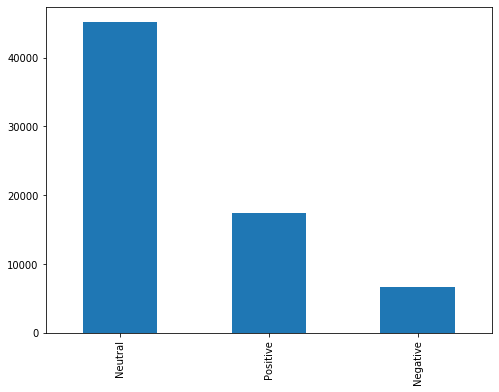

In [94]:
all_comments["sentiment"].value_counts().plot(kind="bar", figsize=(8,6))
plt.savefig('sentiment.png')

In [95]:
def clean_text(data):
    text=re.sub("http[^[:blank:]]+", "", data)
    text=re.sub("@\\w+", "", text)
    text=re.sub("(br|via)","", text)
    text=[i for i in text if i not in string.punctuation]
    text="".join([i.lower() for i in text])
    text=text.split()
    text=[i for i in text if i not in words]
    text=" ".join(text)
    return text

In [96]:
all_comments["texta"]=all_comments["x"].apply(clean_text)

In [97]:
a=all_comments["texta"].str.cat(sep=" ")

In [98]:
wordcloud = WordCloud(collocations=False, max_font_size=200,min_font_size=5,contour_width=3, width=1000, height=500)

In [99]:
wc=wordcloud.generate(a)

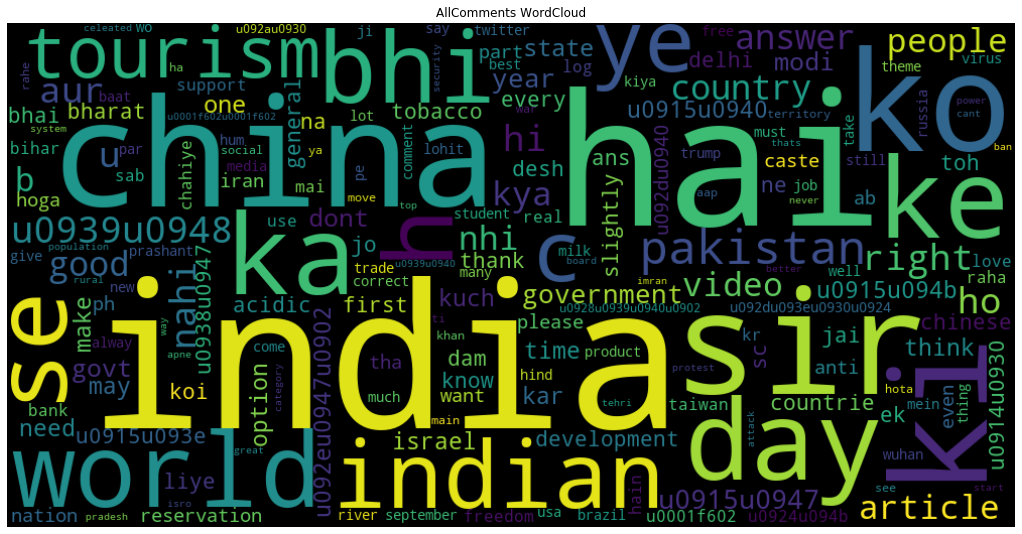

In [100]:
plt.figure(figsize=(14,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("AllComments WordCloud");
plt.tight_layout(pad=0)
plt.savefig('all_comments.png')

In [101]:
liked_comments["texta"]=liked_comments["x"].apply(clean_text)

In [102]:
a=liked_comments["texta"].str.cat(sep=" ")

In [103]:
wordcloud = WordCloud(collocations=False, max_font_size=200,min_font_size=5,contour_width=3, width=1000, height=500)

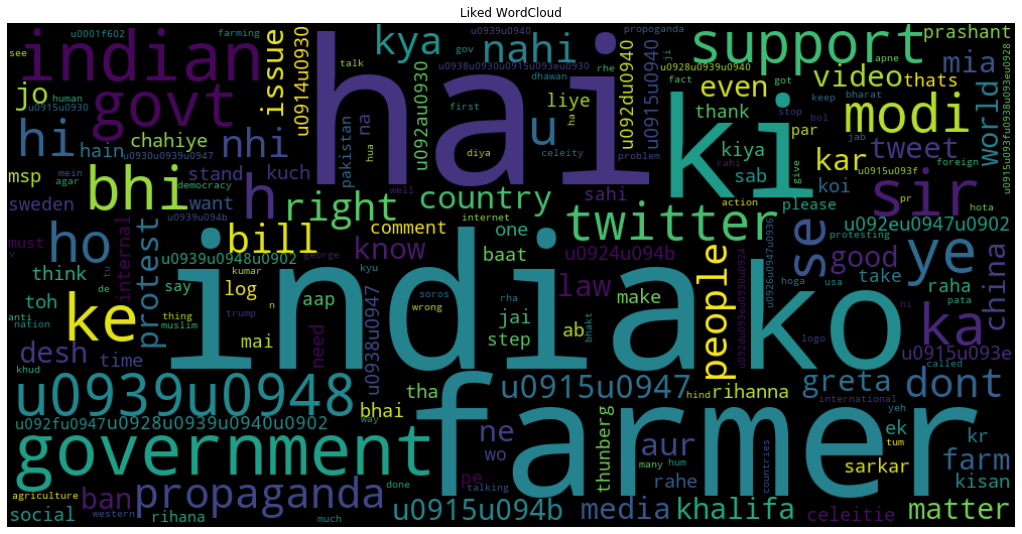

In [104]:
wc=wordcloud.generate(a)
plt.figure(figsize=(14,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Liked WordCloud");
plt.tight_layout(pad=0)
plt.savefig('liked_comments.png')

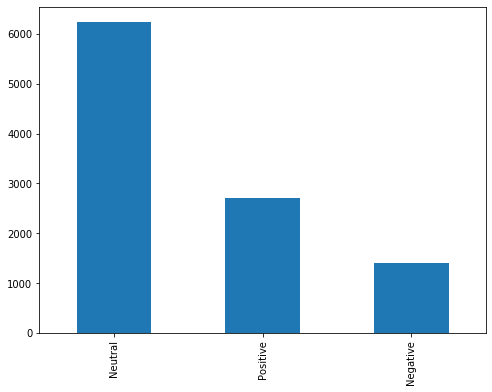

In [114]:
liked_comments["subjectivity"]=liked_comments["x"].apply(lambda x: TextBlob(x).subjectivity)
liked_comments["polarity"]=liked_comments["x"].apply(lambda x: TextBlob(x).polarity)
liked_comments["sentiment"]=np.where(liked_comments["polarity"]>0,"Positive",np.where(liked_comments["polarity"]<0,"Negative","Neutral"))
liked_comments["sentiment"].value_counts().plot(kind="bar", figsize=(8,6))
plt.savefig('disliked_comment_senti.png')

In [106]:
disliked_comments["texta"]=disliked_comments["x"].apply(clean_text)
a=disliked_comments["texta"].str.cat(sep=" ")

In [107]:
wordcloud = WordCloud(collocations=False, max_font_size=200,min_font_size=5,contour_width=3, width=1000, height=500)

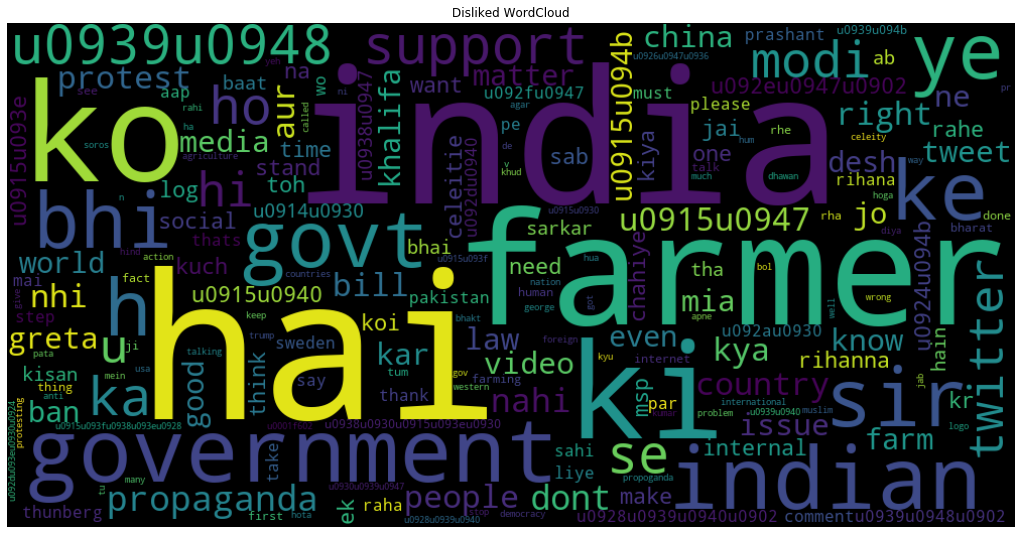

In [108]:
wc=wordcloud.generate(a)
plt.figure(figsize=(14,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Disliked WordCloud")
plt.tight_layout(pad=0)
plt.savefig('disliked_comments.png')

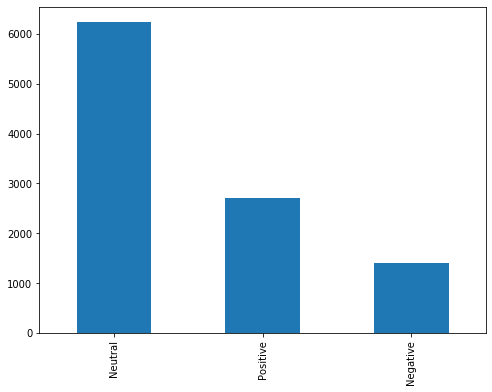

In [109]:
disliked_comments["subjectivity"]=disliked_comments["x"].apply(lambda x: TextBlob(x).subjectivity)
disliked_comments["polarity"]=disliked_comments["x"].apply(lambda x: TextBlob(x).polarity)
disliked_comments["sentiment"]=np.where(disliked_comments["polarity"]>0,"Positive",np.where(disliked_comments["polarity"]<0,"Negative","Neutral"))
disliked_comments["sentiment"].value_counts().plot(kind="bar", figsize=(8,6))
plt.savefig('disliked_comment_senti.png')

In [110]:
time["hour"]=time["x"].dt.hour

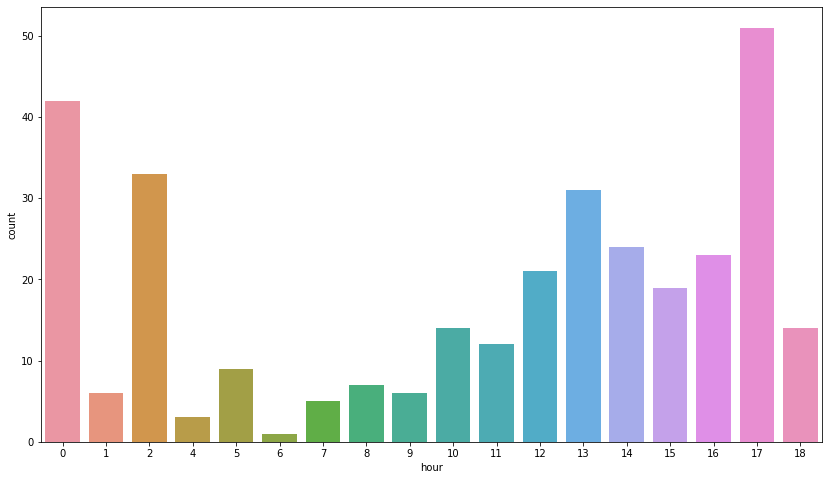

In [111]:
plt.figure(figsize=(14,8))
sns.countplot(time["hour"])
plt.savefig('time_hour.png')